In [3]:
!pip install openpyxl

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.


def REF(pred,y_test,alpha):
    import random
    import numpy as np
    cal=np.array(pred)
    ref=np.array(y_test)
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([20 for i in range(len(ref))])
    u=np.maximum(prec,0.001*ref)
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,100)
    u_cal=(2*np.sqrt(np.array(P))/ref)*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*(0.08*ref)**2+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

# ALPHASENSE #

## co ##

def REF(pred,y_test,alpha):
    import random
    import numpy as np
    cal=np.array(pred)
    ref=np.array(y_test)
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([20 for i in range(len(ref))])
    u=np.maximum(prec,0.001*ref)
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    print([Beta_0,Beta_1])
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,100)
    u_cal=(2*np.sqrt(np.array(P))/ref)*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*(0.08*ref)**2+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [48]:
def REF(pred,y_test,alpha):
    import random
    import numpy as np
    cal=np.array(pred)
    ref=np.array(y_test)
    for i in range(len(ref)):
        if ref[i]==0:
            ref[i]=np.mean(ref)
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([20 for i in range(len(ref))])
    u=np.maximum(prec,0.001*ref)
    u=0.001*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    #P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P2=-(u**2)
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    U1=[]
    Ref=[]
    for i in range(len(P)):
        if P[i]>=0:
            U1.append(P[i])
            Ref.append(ref[i])
    #for i in range(len(P)):
        #if P[i]<0:
           # P[i]=np.mean(P1)
    u=(2*np.sqrt(np.array(U1))/np.array(Ref))*100
    return u,Ref

In [63]:
import numpy as np
import pandas as pd
data_CO=pd.read_excel('final_data.xlsx', engine='openpyxl', sheet_name='CO')
Time=data_CO['time matlab'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data_CO['Time'] = Date.tolist()
#data_CO['Time'] = pd.to_numeric(pd.to_datetime(data_CO['Time']))
data_CO=data_CO.set_index('Time')
data_CO=data_CO.resample('8h').mean()
data_CO=data_CO.dropna()
data_CO['Time'] = data_CO.index
data_CO

,LCS (ppb),Reference (ppb),Precision (0.1% of reading),precision (20ppb),Greater,λ,time matlab,Time
Time,,,,,,,,
2019-10-02 08:00:00,2620.920182,260.755777,0.260756,20.0,20.0,0.2,737700.541667,2019-10-02 08:00:00
2019-10-02 16:00:00,3048.561560,268.448957,0.268449,20.0,20.0,0.2,737700.666667,2019-10-02 16:00:00
2019-10-03 16:00:00,540.899001,281.354037,0.281354,20.0,20.0,0.2,737701.666667,2019-10-03 16:00:00
2019-10-07 08:00:00,428.827168,259.649389,0.259649,20.0,20.0,0.2,737705.541667,2019-10-07 08:00:00
2019-10-07 16:00:00,501.981031,321.898870,0.321899,20.0,20.0,0.2,737705.812500,2019-10-07 16:00:00
...,...,...,...,...,...,...,...,...
2020-12-30 08:00:00,677.607882,1560.011531,1.560012,20.0,20.0,0.2,738155.482143,2020-12-30 08:00:00
2020-12-30 16:00:00,864.687950,2392.087134,2.392087,20.0,20.0,0.2,738155.812500,2020-12-30 16:00:00
2020-12-31 00:00:00,425.377009,1249.232824,1.249233,20.0,20.0,0.2,738156.145833,2020-12-31 00:00:00


In [64]:
lab=data_CO['LCS (ppb)'].to_list()
ref=data_CO['Reference (ppb)'].to_list()
u_cal=REF(lab,ref,1.4)[0]

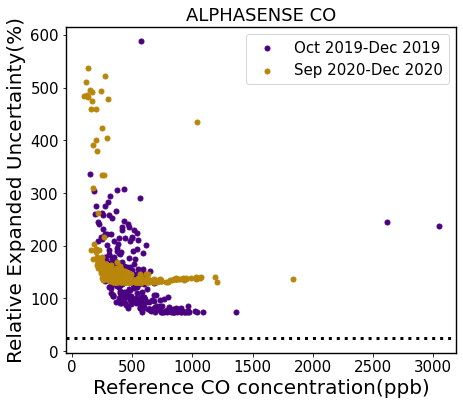

In [65]:
Time=data_CO['Time'].to_list()
lab1=data_CO['LCS (ppb)'].to_list()[:245]
ref1=data_CO['Reference (ppb)'].to_list()[:245]
lab2=data_CO['LCS (ppb)'].to_list()[245:480]
ref2=data_CO['Reference (ppb)'].to_list()[245:480]
lab3=data_CO['LCS (ppb)'].to_list()[480:len(Time)]
ref3=data_CO['Reference (ppb)'].to_list()[480:len(Time)]

import matplotlib.pyplot as plt
u_cal1=REF(lab1,ref1,1.4)[0]
u_cal2=REF(lab2,ref2,1.4)[0]
u_cal3=REF(lab3,ref3,1.4)[0]
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.1)
ind=[]
U_cal1=[]
Ref1=[]
U_cal2=[]
Ref2=[]
U_cal3=[]
Ref3=[]
for i in range(len(lab1)):
    if u_cal1[i]<1000:
        U_cal1.append(u_cal1[i])
        Ref1.append(lab1[i])
for i in range(len(lab2)):
    if u_cal2[i]<1000:
        U_cal2.append(u_cal2[i])
        Ref2.append(lab2[i])
for i in range(len(lab3)):
    if u_cal3[i]<1000:
        U_cal3.append(u_cal3[i])
        Ref3.append(lab3[i])

plt.scatter(Ref1,U_cal1, color='#4B0082',marker='.',s=100)
#plt.scatter(Ref2,U_cal2, color='teal',marker='.',s=50)
plt.scatter(Ref3,U_cal3, color='darkgoldenrod',marker='.',s=100)
dqo=[25 for i in range(len(Ref1))]
Time=np.array(data_CO['Time'].to_list())
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
#plt.scatter(Ref,U_cal,marker='.',s=100,c=Time,cmap=reversed_color_map)

plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=20)
#plt.ylabel(r'$H_{2}$', fontsize=24)
plt.xlabel('Reference CO concentration(ppb)',fontsize=20)
plt.legend(['Oct 2019-Dec 2019','Sep 2020-Dec 2020'], fontsize=15)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=1.4)
plt.title('ALPHASENSE CO',fontsize=18)
plt.savefig("CO_DQO.pdf",format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

In [66]:
A=[[Ref1[i],U_cal1[i]] for i in range(len(Ref1))]
df1= pd.DataFrame (A, columns = ['Conc', 'REU'])
df1.head()
df1.to_csv('oct2019_dec2019_Alphasense.csv')

In [67]:
B=[[Ref3[i],U_cal3[i]] for i in range(len(Ref3))]
df2= pd.DataFrame (B, columns = ['Conc', 'REU'])
df2.head()
df2.to_csv('sep2020_dec2020_Alphasense.csv')

In [12]:
Data1=[[Ref1[i], U_cal1[i]] for i in range(len(Ref1))]
A_CO_2019= pd.DataFrame(Data1, columns=['Ref_conc', 'REU'])
A_CO_2019.to_excel("A_CO_2019.xlsx")

Data2=[[Ref3[i], U_cal3[i]] for i in range(len(Ref3))]
A_CO_2020= pd.DataFrame(Data2, columns=['Ref_conc', 'REU'])
A_CO_2020.to_excel("A_CO_2020.xlsx")


# NO2 #

def REF(pred,y_test,alpha):
    import random
    import numpy as np
    cal=np.array(pred)
    ref=np.array(y_test)
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([0.4 for i in range(len(ref))])
    u=np.maximum(prec,0.005*ref)
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    print(Beta_0, Beta_1)
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,100)
    u_cal=(2*np.sqrt(np.array(P))/ref)*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*(0.08*ref)**2+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [13]:
import pandas as pd
data_NO2=pd.read_excel('final_data.xlsx', engine='openpyxl', sheet_name='NO2')
data_NO2

,LCS (ppb),Reference (ppb),Precision (0.5% of reading),precision (0.4 ppb),Greater,λ,time,time matlab
0,16.194840,9.928468,0.049642,0.4,0.400000,37.500000,'02-Oct-2019 12:00:00',737700.500000
1,6.764827,15.201376,0.076007,0.4,0.400000,37.500000,'02-Oct-2019 13:00:00',737700.541667
2,11.775937,12.957107,0.064786,0.4,0.400000,37.500000,'02-Oct-2019 16:00:00',737700.666667
3,29.961170,14.371937,0.071860,0.4,0.400000,37.500000,'03-Oct-2019 16:00:00',737701.666667
4,10.069838,17.249565,0.086248,0.4,0.400000,37.500000,'07-Oct-2019 14:00:00',737705.583333
...,...,...,...,...,...,...,...,...
3985,33.705730,22.192404,0.110962,0.4,0.400000,37.500000,'19-Oct-2020 14:00:00',738083.583333
3986,0.403924,94.531614,0.472658,0.4,0.472658,31.735415,'13-Nov-2020 20:00:00',738108.833333
3987,0.828964,88.008742,0.440044,0.4,0.440044,34.087523,'23-Nov-2020 17:00:00',738118.708333
3988,6.752765,97.479861,0.487399,0.4,0.487399,30.775588,'23-Nov-2020 18:00:00',738118.750000


In [14]:
lab=data_NO2['LCS (ppb)'].to_list()
ref=data_NO2['Reference (ppb)'].to_list()
u_cal=REF(lab,ref,1.4)[0]

In [55]:
Time=data_NO2['time'].to_list()
Time[3360]

"'20-Apr-2020 08:00:00'"

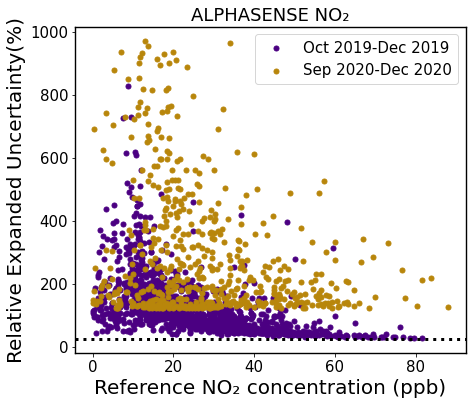

In [70]:
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
Time=data_NO2['time'].to_list()
lab1=data_NO2['LCS (ppb)'].to_list()[:1650]
ref1=data_NO2['Reference (ppb)'].to_list()[:1650]
lab2=data_NO2['LCS (ppb)'].to_list()[1650:3360]
ref2=data_NO2['Reference (ppb)'].to_list()[1650:3360]
lab3=data_NO2['LCS (ppb)'].to_list()[3360:len(Time)]
ref3=data_NO2['Reference (ppb)'].to_list()[3360:len(Time)]

import matplotlib.pyplot as plt
u_cal1=REF(lab1,ref1,1.3)[0]
u_cal2=REF(lab2,ref2,1.3)[0]
u_cal3=REF(lab3,ref3,1.3)[0]
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.1)
ind=[]
U_cal1=[]
Ref1=[]
U_cal2=[]
Ref2=[]
U_cal3=[]
Ref3=[]
for i in range(len(lab1)):
    if u_cal1[i]<1000:
        U_cal1.append(u_cal1[i])
        Ref1.append(lab1[i])
for i in range(len(lab2)):
    if u_cal2[i]<1000:
        U_cal2.append(u_cal2[i])
        Ref2.append(lab2[i])
for i in range(len(lab3)):
    if u_cal3[i]<1000:
        U_cal3.append(u_cal3[i])
        Ref3.append(lab3[i])

dqo=[25 for i in range(len(Ref1))]
plt.scatter(Ref1,U_cal1, color='#4B0082',marker='.',s=100)
#plt.scatter(Ref2,U_cal2, color='teal',marker='.',s=50)
plt.scatter(Ref3,U_cal3, color='darkgoldenrod',marker='.',s=100)
Time=np.array(data_CO['Time'].to_list())
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
#plt.scatter(Ref,U_cal,marker='.',s=100,c=Time,cmap=reversed_color_map)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=20)
#plt.ylabel(r'$H_{2}$', fontsize=24)
plt.xlabel('Reference NO2 concentration (ppb)'.translate(SUB),fontsize=20)
plt.legend(['Oct 2019-Dec 2019','Sep 2020-Dec 2020'], fontsize=15)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.setp(ax.spines.values(), linewidth=1.4)
#plt.grid(linestyle='-.',linewidth=0.1)
#plt.title('LAB',fontsize=18)
plt.title('ALPHASENSE NO2'.translate(SUB),fontsize=18)
plt.savefig("NO2_DQO.pdf",format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

In [23]:
Data1=[[Ref1[i], U_cal1[i]] for i in range(len(Ref1))]
A_CO_2019= pd.DataFrame(Data1, columns=['Ref_conc', 'REU'])
A_CO_2019.to_excel("A_NO2_2019.xlsx")

Data2=[[Ref3[i], U_cal3[i]] for i in range(len(Ref3))]
A_CO_2020= pd.DataFrame(Data2, columns=['Ref_conc', 'REU'])
A_CO_2020.to_excel("A_NO2_2020.xlsx")

# O3 #

def REF(pred,y_test,alpha):
    import random
    import numpy as np
    cal=np.array(pred)
    ref=np.array(y_test)
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([1 for i in range(len(ref))])
    u=prec
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,100)
    u_cal=(2*np.sqrt(np.array(P))/ref)*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*(0.08*ref)**2+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [15]:
import pandas as pd
data_O3=pd.read_excel('final_data.xlsx', engine='openpyxl', sheet_name='O3')
data_O3

,LCS (ppb),Reference (ppb),λ (15/1),time,time matlab
0,214.299967,33.131701,15,'03-Oct-2019 16:00:00',737701.666667
1,188.838900,42.068068,15,'07-Oct-2019 11:00:00',737705.458333
2,116.414713,42.201664,15,'07-Oct-2019 12:00:00',737705.500000
3,183.507622,46.237601,15,'07-Oct-2019 13:00:00',737705.541667
4,217.139469,40.835853,15,'07-Oct-2019 14:00:00',737705.583333
...,...,...,...,...,...
5043,77.083326,40.420060,15,'31-Dec-2020 17:00:00',738156.708333
5044,62.933952,31.160191,15,'31-Dec-2020 18:00:00',738156.750000
5045,58.701665,6.206343,15,'31-Dec-2020 19:00:00',738156.791667
5046,39.480333,5.175187,15,'31-Dec-2020 20:00:00',738156.833333


In [16]:
Time=data_O3['time'].to_list()
Time[3700]

"'30-Apr-2020 18:00:00'"

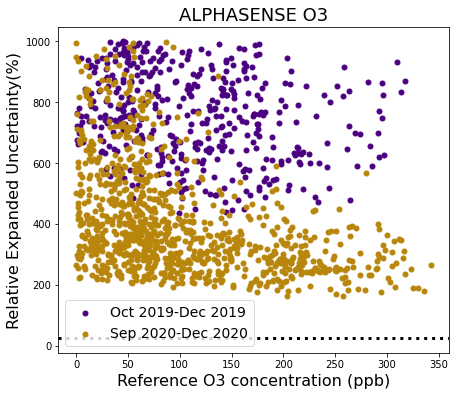

In [18]:
Time=data_O3['time'].to_list()
lab1=data_O3['LCS (ppb)'].to_list()[:1820]
ref1=data_O3['Reference (ppb)'].to_list()[:1820]
lab2=data_O3['LCS (ppb)'].to_list()[1820:3700]
ref2=data_O3['Reference (ppb)'].to_list()[1820:3700]
lab3=data_O3['LCS (ppb)'].to_list()[3700:len(Time)]
ref3=data_O3['Reference (ppb)'].to_list()[3700:len(Time)]

import matplotlib.pyplot as plt
u_cal1=REF(lab1,ref1,1.2)[0]
u_cal2=REF(lab2,ref2,1.2)[0]
u_cal3=REF(lab3,ref3,1.2)[0]
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.1)
ind=[]
U_cal1=[]
Ref1=[]
U_cal2=[]
Ref2=[]
U_cal3=[]
Ref3=[]
for i in range(len(lab1)):
    if u_cal1[i]<1000:
        U_cal1.append(u_cal1[i])
        Ref1.append(lab1[i])
for i in range(len(lab2)):
    if u_cal2[i]<1000:
        U_cal2.append(u_cal2[i])
        Ref2.append(lab2[i])
for i in range(len(lab3)):
    if u_cal3[i]<1000:
        U_cal3.append(u_cal3[i])
        Ref3.append(lab3[i])

dqo=[25 for i in range(len(Ref1))]
plt.scatter(Ref1,U_cal1, color='#4B0082',marker='.',s=100)
#plt.scatter(Ref2,U_cal2, color='teal',marker='.',s=50)
plt.scatter(Ref3,U_cal3, color='darkgoldenrod',marker='.',s=100)
Time=np.array(data_CO['Time'].to_list())
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
#plt.scatter(Ref,U_cal,marker='.',s=100,c=Time,cmap=reversed_color_map)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
#plt.ylabel(r'$H_{2}$', fontsize=24)
plt.xlabel('Reference O3 concentration (ppb)',fontsize=16)
plt.legend(['Oct 2019-Dec 2019','Sep 2020-Dec 2020'], fontsize=14)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
#plt.grid(linestyle='-.',linewidth=0.1)
#plt.title('LAB',fontsize=18)
plt.title('ALPHASENSE O3',fontsize=18)
plt.show()

In [19]:
Data1=[[Ref1[i], U_cal1[i]] for i in range(len(Ref1))]
A_CO_2019= pd.DataFrame(Data1, columns=['Ref_conc', 'REU'])
A_CO_2019.to_excel("A_O3_2019.xlsx")

Data2=[[Ref3[i], U_cal3[i]] for i in range(len(Ref3))]
A_CO_2020= pd.DataFrame(Data2, columns=['Ref_conc', 'REU'])
A_CO_2020.to_excel("A_O3_2020.xlsx")

# SO2 #

def REF(pred,y_test,alpha):
    import random
    import numpy as np
    cal=np.array(pred)
    ref=np.array(y_test)
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([0.5 for i in range(len(ref))])
    u=np.maximum(prec,0.0015*ref)
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,100)
    u_cal=(2*np.sqrt(np.array(P))/ref)*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*(0.08*ref)**2+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [20]:
import pandas as pd
data_SO2=pd.read_excel('final_data.xlsx', engine='openpyxl', sheet_name='SO2')
data_SO2

,LCS (ppb),Reference (ppb),Precision (0.15% of reading),precision (0.5 ppb),Greater,λ,time,time matlab
0,127.493863,1.497022,0.002246,0.5,0.5,30,'02-Oct-2019 13:00:00',737700.541667
1,40.588564,1.421115,0.002132,0.5,0.5,30,'03-Oct-2019 16:00:00',737701.666667
2,11.067794,2.093634,0.003140,0.5,0.5,30,'07-Oct-2019 11:00:00',737705.458333
3,15.251380,1.696417,0.002545,0.5,0.5,30,'07-Oct-2019 12:00:00',737705.500000
4,32.710258,1.416432,0.002125,0.5,0.5,30,'07-Oct-2019 13:00:00',737705.541667
...,...,...,...,...,...,...,...,...
3859,42.057006,2.799977,0.004200,0.5,0.5,30,'31-Dec-2020 19:00:00',738156.791667
3860,76.261634,3.763351,0.005645,0.5,0.5,30,'31-Dec-2020 20:00:00',738156.833333
3861,137.039708,4.248347,0.006373,0.5,0.5,30,'31-Dec-2020 21:00:00',738156.875000
3862,98.341529,2.554624,0.003832,0.5,0.5,30,'31-Dec-2020 23:00:00',738156.958333


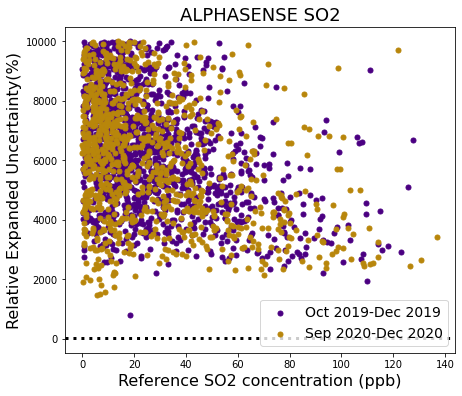

In [21]:
Time=data_SO2['time'].to_list()
lab1=data_SO2['LCS (ppb)'].to_list()[:1750]
ref1=data_SO2['Reference (ppb)'].to_list()[:1750]
lab2=data_SO2['LCS (ppb)'].to_list()[1750:2520]
ref2=data_SO2['Reference (ppb)'].to_list()[1750:2520]
lab3=data_SO2['LCS (ppb)'].to_list()[2520:len(Time)]
ref3=data_SO2['Reference (ppb)'].to_list()[2520:len(Time)]

import matplotlib.pyplot as plt
u_cal1=REF(lab1,ref1,3.9)[0]
u_cal2=REF(lab2,ref2,3.9)[0]
u_cal3=REF(lab3,ref3,3.9)[0]
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.1)
ind=[]
U_cal1=[]
Ref1=[]
U_cal2=[]
Ref2=[]
U_cal3=[]
Ref3=[]
for i in range(len(lab1)):
    if u_cal1[i]<10000:
        U_cal1.append(u_cal1[i])
        Ref1.append(lab1[i])
for i in range(len(lab2)):
    if u_cal2[i]<10000:
        U_cal2.append(u_cal2[i])
        Ref2.append(lab2[i])
for i in range(len(lab3)):
    if u_cal3[i]<10000:
        U_cal3.append(u_cal3[i])
        Ref3.append(lab3[i])

dqo=[25 for i in range(len(Ref1))]
plt.scatter(Ref1,U_cal1, color='#4B0082',marker='.',s=100)
#plt.scatter(Ref2,U_cal2, color='teal',marker='.',s=50)
plt.scatter(Ref3,U_cal3, color='darkgoldenrod',marker='.',s=100)
Time=np.array(data_CO['Time'].to_list())
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
#plt.scatter(Ref,U_cal,marker='.',s=100,c=Time,cmap=reversed_color_map)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
#plt.ylabel(r'$H_{2}$', fontsize=24)
plt.xlabel('Reference SO2 concentration (ppb)',fontsize=16)
plt.legend(['Oct 2019-Dec 2019','Sep 2020-Dec 2020'], fontsize=14)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
#plt.grid(linestyle='-.',linewidth=0.1)
#plt.title('LAB',fontsize=18)
plt.title('ALPHASENSE SO2',fontsize=18)
plt.show()

In [22]:
Data1=[[Ref1[i], U_cal1[i]] for i in range(len(Ref1))]
A_CO_2019= pd.DataFrame(Data1, columns=['Ref_conc', 'REU'])
A_CO_2019.to_excel("A_SO2_2019.xlsx")

Data2=[[Ref3[i], U_cal3[i]] for i in range(len(Ref3))]
A_CO_2020= pd.DataFrame(Data2, columns=['Ref_conc', 'REU'])
A_CO_2020.to_excel("A_SO2_2020.xlsx")

# WINSEN #

## CO ##

In [74]:
import pandas as pd
data_CO=pd.read_excel('final_data.xlsx', engine='openpyxl', sheet_name='Winsen_CO')
data_CO['Time'] = pd.to_datetime(data_CO['time'])
data_CO=data_CO.set_index('Time')
data_CO['time']=data_CO.index
data_CO=data_CO.resample('8h').mean()
data_CO=data_CO.dropna()
data_CO

,LCS (ppb),Reference (ppb),Precision (0.1% of reading),precision (20ppb),Greater,λ (150ug/m³/20),time matlab
Time,,,,,,,
2019-10-02 08:00:00,1289.544041,260.755777,0.260756,20.0,20.0,6.55,737700.541667
2019-10-02 16:00:00,541.674116,277.198132,0.277198,20.0,20.0,6.55,737700.812500
2019-10-03 00:00:00,406.570201,348.476939,0.348477,20.0,20.0,6.55,737701.145833
2019-10-03 08:00:00,520.689150,371.876507,0.371877,20.0,20.0,6.55,737701.375000
2019-10-03 16:00:00,446.460077,274.579088,0.274579,20.0,20.0,6.55,737701.812500
...,...,...,...,...,...,...,...
2020-09-22 16:00:00,199.643009,685.446322,0.685446,20.0,20.0,6.55,738056.791667
2020-10-19 08:00:00,265.076424,523.927256,0.523927,20.0,20.0,6.55,738083.583333
2020-11-11 08:00:00,299.844383,954.393505,0.954394,20.0,20.0,6.55,738106.541667


def REF(pred,y_test,alpha):
    import random
    import numpy as np
    cal=np.array(pred)
    ref=np.array(y_test)
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([20 for i in range(len(ref))])
    u=np.maximum(prec,0.001*ref)
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    print(Beta_0,Beta_1)
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,100)
    u_cal=(2*np.sqrt(np.array(P))/ref)*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*(0.08*ref)**2+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [82]:
lab=data_CO['LCS (ppb)'].to_list()
ref=data_CO['Reference (ppb)'].to_list()
u_cal=REF(lab,ref,1.4)

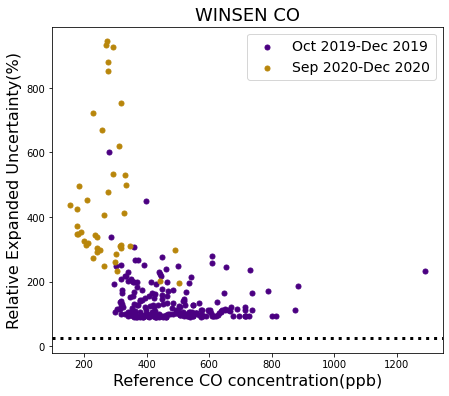

In [83]:
Time=data_CO.index
lab1=data_CO['LCS (ppb)'].to_list()[:int(1730/8)]
ref1=data_CO['Reference (ppb)'].to_list()[:int(1730/8)]
lab2=data_CO['LCS (ppb)'].to_list()[int(1730/8):int(3590/8)]
ref2=data_CO['Reference (ppb)'].to_list()[int(1730/8):int(3590/8)]
lab3=data_CO['LCS (ppb)'].to_list()[int(3590/8):len(Time)]
ref3=data_CO['Reference (ppb)'].to_list()[int(3590/8):len(Time)]

import matplotlib.pyplot as plt
u_cal1=REF(lab1,ref1,1.4)[0]
u_cal2=REF(lab2,ref2,1.4)[0]
u_cal3=REF(lab3,ref3,1.4)[0]
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.1)
ind=[]
U_cal1=[]
Ref1=[]
U_cal2=[]
Ref2=[]
U_cal3=[]
Ref3=[]
for i in range(len(lab1)):
    if u_cal1[i]<1000:
        U_cal1.append(u_cal1[i])
        Ref1.append(lab1[i])
for i in range(len(lab2)):
    if u_cal2[i]<1000:
        U_cal2.append(u_cal2[i])
        Ref2.append(lab2[i])
for i in range(len(lab3)):
    if u_cal3[i]<1000:
        U_cal3.append(u_cal3[i])
        Ref3.append(lab3[i])

plt.scatter(Ref1,U_cal1, color='#4B0082',marker='.',s=100)
#plt.scatter(Ref2,U_cal2, color='teal',marker='.',s=50)
plt.scatter(Ref3,U_cal3, color='darkgoldenrod',marker='.',s=100)
dqo=[25 for i in range(len(Ref1))]
#Time=np.array(data_CO['Time'].to_list())
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
#plt.scatter(Ref,U_cal,marker='.',s=100,c=Time,cmap=reversed_color_map)

plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
#plt.ylabel(r'$H_{2}$', fontsize=24)
plt.xlabel('Reference CO concentration(ppb)',fontsize=16)
plt.legend(['Oct 2019-Dec 2019','Sep 2020-Dec 2020'], fontsize=14)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
#plt.grid(linestyle='-.',linewidth=0.1)
#plt.title('LAB',fontsize=18)
plt.title('WINSEN CO',fontsize=18)
plt.show()

In [84]:
A=[[Ref1[i],U_cal1[i]] for i in range(len(Ref1))]
df1= pd.DataFrame (A, columns = ['Conc', 'REU'])
df1.head()
df1.to_csv('oct2019_dec2019_Winsen.csv')

In [85]:
B=[[Ref3[i],U_cal3[i]] for i in range(len(Ref3))]
df2= pd.DataFrame (B, columns = ['Conc', 'REU'])
df2.head()
df2.to_csv('Sep2020_dec2020_Winsen.csv')

In [27]:
Data1=[[Ref1[i], U_cal1[i]] for i in range(len(Ref1))]
W_CO_2019= pd.DataFrame(Data1, columns=['Ref_conc', 'REU'])
W_CO_2019.to_excel("W_CO_2019.xlsx")

Data2=[[Ref3[i], U_cal3[i]] for i in range(len(Ref3))]
W_CO_2020= pd.DataFrame(Data2, columns=['Ref_conc', 'REU'])
W_CO_2020.to_excel("W_CO_2020.xlsx")

## NO2 ##

In [28]:
import pandas as pd
data_NO2=pd.read_excel('final_data.xlsx', engine='openpyxl', sheet_name='Winsen_NO2')
data_NO2

,LCS (ppb),Reference (ppb),Precision (0.5% of reading),precision (0.4 ppb),Greater,λ (16ppb/greater),time,time matlab
0,13.323120,15.201376,0.076007,0.4,0.4,40.0,'02-Oct-2019 13:00:00',737700.541667
1,12.327343,12.957107,0.064786,0.4,0.4,40.0,'02-Oct-2019 16:00:00',737700.666667
2,26.489319,18.323288,0.091616,0.4,0.4,40.0,'02-Oct-2019 17:00:00',737700.708333
3,65.603944,17.013020,0.085065,0.4,0.4,40.0,'02-Oct-2019 18:00:00',737700.750000
4,65.548064,15.687344,0.078437,0.4,0.4,40.0,'02-Oct-2019 19:00:00',737700.791667
...,...,...,...,...,...,...,...,...
3895,62.780645,78.186127,0.390931,0.4,0.4,40.0,'11-Nov-2020 21:00:00',738106.875000
3896,52.163399,65.764299,0.328821,0.4,0.4,40.0,'11-Nov-2020 22:00:00',738106.916667
3897,46.287582,55.861265,0.279306,0.4,0.4,40.0,'11-Nov-2020 23:00:00',738106.958333
3898,41.986577,51.477190,0.257386,0.4,0.4,40.0,'12-Nov-2020 00:00:00',738107.000000


def REF(pred,y_test,alpha):
    import random
    import numpy as np
    cal=np.array(pred)
    ref=np.array(y_test)
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([0.4 for i in range(len(ref))])
    u=np.maximum(prec,0.005*ref)
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    print(Beta_0,Beta_1)
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,100)
    u_cal=(2*np.sqrt(np.array(P))/ref)*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*(0.08*ref)**2+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [29]:
Time=data_NO2['time'].to_list()
Time[3700]

"'31-Mar-2020 22:00:00'"

In [30]:
lab=data_NO2['LCS (ppb)'].to_list()
ref=data_NO2['Reference (ppb)'].to_list()
u_cal=REF(lab,ref,1.4)

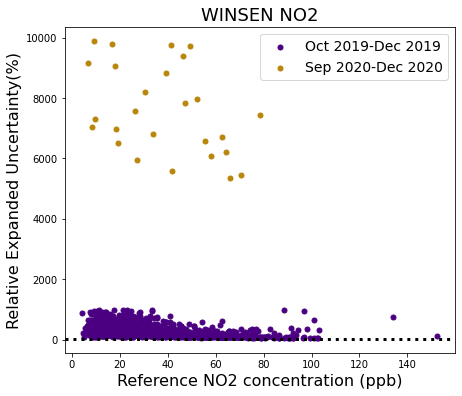

In [32]:
Time=data_NO2['time'].to_list()
lab1=data_NO2['LCS (ppb)'].to_list()[:1750]
ref1=data_NO2['Reference (ppb)'].to_list()[:1750]
lab2=data_NO2['LCS (ppb)'].to_list()[1750:3700]
ref2=data_NO2['Reference (ppb)'].to_list()[1750:3700]
lab3=data_NO2['LCS (ppb)'].to_list()[3700:len(Time)]
ref3=data_NO2['Reference (ppb)'].to_list()[3700:len(Time)]

import matplotlib.pyplot as plt
u_cal1=REF(lab1,ref1,1.3)[0]
u_cal2=REF(lab2,ref2,1.3)[0]
u_cal3=REF(lab3,ref3,1.3)[0]
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.1)
ind=[]
U_cal1=[]
Ref1=[]
U_cal2=[]
Ref2=[]
U_cal3=[]
Ref3=[]
for i in range(len(lab1)):
    if u_cal1[i]<1000:
        U_cal1.append(u_cal1[i])
        Ref1.append(lab1[i])
for i in range(len(lab2)):
    if u_cal2[i]<1000:
        U_cal2.append(u_cal2[i])
        Ref2.append(lab2[i])
for i in range(len(lab3)):
    if u_cal3[i]<10000:
        U_cal3.append(u_cal3[i])
        Ref3.append(lab3[i])

dqo=[25 for i in range(len(Ref1))]
plt.scatter(Ref1,U_cal1, color='#4B0082',marker='.',s=100)
#plt.scatter(Ref2,U_cal2, color='teal',marker='.',s=50)
plt.scatter(Ref3,U_cal3, color='darkgoldenrod',marker='.',s=100)
#Time=np.array(data_CO['Time'].to_list())
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
#plt.scatter(Ref,U_cal,marker='.',s=100,c=Time,cmap=reversed_color_map)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
#plt.ylabel(r'$H_{2}$', fontsize=24)
plt.xlabel('Reference NO2 concentration (ppb)',fontsize=16)
plt.legend(['Oct 2019-Dec 2019','Sep 2020-Dec 2020'], fontsize=14)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
#plt.grid(linestyle='-.',linewidth=0.1)
#plt.title('LAB',fontsize=18)
plt.title('WINSEN NO2',fontsize=18)
plt.show()

In [33]:
Data1=[[Ref1[i], U_cal1[i]] for i in range(len(Ref1))]
W_CO_2019= pd.DataFrame(Data1, columns=['Ref_conc', 'REU'])
W_CO_2019.to_excel("W_NO2_2019.xlsx")

Data2=[[Ref3[i], U_cal3[i]] for i in range(len(Ref3))]
W_CO_2020= pd.DataFrame(Data2, columns=['Ref_conc', 'REU'])
W_CO_2020.to_excel("W_NO2_2020.xlsx")

## O3 ##

def REF(pred,y_test,alpha):
    import random
    import numpy as np
    cal=np.array(pred)
    ref=np.array(y_test)
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([1 for i in range(len(ref))])
    u=prec
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,100)
    u_cal=(2*np.sqrt(np.array(P))/ref)*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*(0.08*ref)**2+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [34]:
import pandas as pd
data_O3=pd.read_excel('final_data.xlsx', engine='openpyxl', sheet_name='Winsen_O3')
data_O3

,LCS (ppb),Reference (ppb),λ (15.32/1),time,time matlab
0,368.851562,50.451092,15.32,'02-Oct-2019 13:00:00',737700.541667
1,303.401554,38.123551,15.32,'02-Oct-2019 16:00:00',737700.666667
2,23.718667,33.768998,15.32,'02-Oct-2019 17:00:00',737700.708333
3,11.726453,31.920945,15.32,'02-Oct-2019 18:00:00',737700.750000
4,10.227772,30.792659,15.32,'02-Oct-2019 19:00:00',737700.791667
...,...,...,...,...,...
3874,62.780645,1.630323,15.32,'11-Nov-2020 21:00:00',738106.875000
3875,52.163399,1.810759,15.32,'11-Nov-2020 22:00:00',738106.916667
3876,46.287582,1.263596,15.32,'11-Nov-2020 23:00:00',738106.958333
3877,41.986577,0.679273,15.32,'12-Nov-2020 00:00:00',738107.000000


In [35]:
Time=data_O3['time'].to_list()
Time[3660]

"'31-Mar-2020 04:00:00'"

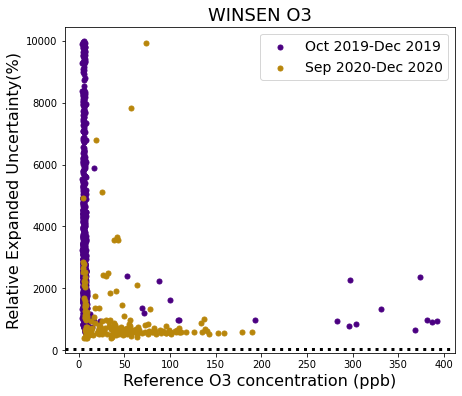

In [37]:
Time=data_O3['time'].to_list()
lab1=data_O3['LCS (ppb)'].to_list()[:1750]
ref1=data_O3['Reference (ppb)'].to_list()[:1750]
lab2=data_O3['LCS (ppb)'].to_list()[1750:3660]
ref2=data_O3['Reference (ppb)'].to_list()[1750:3660]
lab3=data_O3['LCS (ppb)'].to_list()[3660:len(Time)]
ref3=data_O3['Reference (ppb)'].to_list()[3660:len(Time)]

import matplotlib.pyplot as plt
u_cal1=REF(lab1,ref1,1.2)[0]
u_cal2=REF(lab2,ref2,1.2)[0]
u_cal3=REF(lab3,ref3,1.2)[0]
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.1)
ind=[]
U_cal1=[]
Ref1=[]
U_cal2=[]
Ref2=[]
U_cal3=[]
Ref3=[]
for i in range(len(lab1)):
    if u_cal1[i]<10000:
        U_cal1.append(u_cal1[i])
        Ref1.append(lab1[i])
for i in range(len(lab2)):
    if u_cal2[i]<10000:
        U_cal2.append(u_cal2[i])
        Ref2.append(lab2[i])
for i in range(len(lab3)):
    if u_cal3[i]<10000:
        U_cal3.append(u_cal3[i])
        Ref3.append(lab3[i])

dqo=[25 for i in range(len(Ref1))]
plt.scatter(Ref1,U_cal1, color='#4B0082',marker='.',s=100)
#plt.scatter(Ref2,U_cal2, color='teal',marker='.',s=50)
plt.scatter(Ref3,U_cal3, color='darkgoldenrod',marker='.',s=100)
#Time=np.array(data_CO['Time'].to_list())
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
#plt.scatter(Ref,U_cal,marker='.',s=100,c=Time,cmap=reversed_color_map)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
#plt.ylabel(r'$H_{2}$', fontsize=24)
plt.xlabel('Reference O3 concentration (ppb)',fontsize=16)
plt.legend(['Oct 2019-Dec 2019','Sep 2020-Dec 2020'], fontsize=14)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
#plt.grid(linestyle='-.',linewidth=0.1)
#plt.title('LAB',fontsize=18)
plt.title('WINSEN O3',fontsize=18)
plt.show()

In [38]:
Data1=[[Ref1[i], U_cal1[i]] for i in range(len(Ref1))]
W_CO_2019= pd.DataFrame(Data1, columns=['Ref_conc', 'REU'])
W_CO_2019.to_excel("W_O3_2019.xlsx")

Data2=[[Ref3[i], U_cal3[i]] for i in range(len(Ref3))]
W_CO_2020= pd.DataFrame(Data2, columns=['Ref_conc', 'REU'])
W_CO_2020.to_excel("W_O3_2020.xlsx")

## SO2 ##

def REF(pred,y_test,alpha):
    import random
    import numpy as np
    cal=np.array(pred)
    ref=np.array(y_test)
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([0.5 for i in range(len(ref))])
    u=np.maximum(prec,0.0015*ref)
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,100)
    u_cal=(2*np.sqrt(np.array(P))/ref)*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*(0.08*ref)**2+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [39]:
import pandas as pd
data_SO2=pd.read_excel('final_data.xlsx', engine='openpyxl', sheet_name='Winsen_SO2')
data_SO2

,LCS (ppb),Reference (ppb),Precision (0.15% of reading),precision (0.5 ppb),Greater,λ,time,time matlab
0,11.128710,1.372090,0.002058,0.5,0.5,22.9,'02-Oct-2019 17:00:00',737700.708333
1,6.919786,1.356229,0.002034,0.5,0.5,22.9,'02-Oct-2019 18:00:00',737700.750000
2,4.836055,1.398902,0.002098,0.5,0.5,22.9,'02-Oct-2019 19:00:00',737700.791667
3,4.464428,1.386293,0.002079,0.5,0.5,22.9,'02-Oct-2019 20:00:00',737700.833333
4,4.000000,1.332889,0.001999,0.5,0.5,22.9,'02-Oct-2019 21:00:00',737700.875000
...,...,...,...,...,...,...,...,...
3883,32.967742,6.150525,0.009226,0.5,0.5,22.9,'11-Nov-2020 21:00:00',738106.875000
3884,29.189542,5.735341,0.008603,0.5,0.5,22.9,'11-Nov-2020 22:00:00',738106.916667
3885,16.516340,4.783810,0.007176,0.5,0.5,22.9,'11-Nov-2020 23:00:00',738106.958333
3886,8.664430,3.684368,0.005527,0.5,0.5,22.9,'12-Nov-2020 00:00:00',738107.000000


In [40]:
Time=data_SO2['time'].to_list()
Time[3690]

"'01-Apr-2020 03:00:00'"

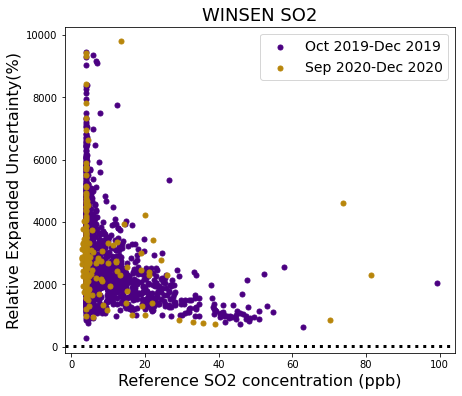

In [42]:
Time=data_SO2['time'].to_list()
lab1=data_SO2['LCS (ppb)'].to_list()[:1750]
ref1=data_SO2['Reference (ppb)'].to_list()[:1750]
lab2=data_SO2['LCS (ppb)'].to_list()[1750:3690]
ref2=data_SO2['Reference (ppb)'].to_list()[1750:3690]
lab3=data_SO2['LCS (ppb)'].to_list()[3690:len(Time)]
ref3=data_SO2['Reference (ppb)'].to_list()[3690:len(Time)]

import matplotlib.pyplot as plt
u_cal1=REF(lab1,ref1,1.3)[0]
u_cal2=REF(lab2,ref2,1.3)[0]
u_cal3=REF(lab3,ref3,1.3)[0]
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.1)
ind=[]
U_cal1=[]
Ref1=[]
U_cal2=[]
Ref2=[]
U_cal3=[]
Ref3=[]
for i in range(len(lab1)):
    if u_cal1[i]<10000:
        U_cal1.append(u_cal1[i])
        Ref1.append(lab1[i])
for i in range(len(lab2)):
    if u_cal2[i]<10000:
        U_cal2.append(u_cal2[i])
        Ref2.append(lab2[i])
for i in range(len(lab3)):
    if u_cal3[i]<10000:
        U_cal3.append(u_cal3[i])
        Ref3.append(lab3[i])
dqo=[25 for i in range(len(Ref1))]
plt.scatter(Ref1,U_cal1, color='#4B0082',marker='.',s=100)
#plt.scatter(Ref2,U_cal2, color='teal',marker='.',s=50)
plt.scatter(Ref3,U_cal3, color='darkgoldenrod',marker='.',s=100)
#Time=np.array(data_CO['Time'].to_list())
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
#plt.scatter(Ref,U_cal,marker='.',s=100,c=Time,cmap=reversed_color_map)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
#plt.ylabel(r'$H_{2}$', fontsize=24)
plt.xlabel('Reference SO2 concentration (ppb)',fontsize=16)
plt.legend(['Oct 2019-Dec 2019','Sep 2020-Dec 2020'], fontsize=14)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
#plt.grid(linestyle='-.',linewidth=0.1)
#plt.title('LAB',fontsize=18)
plt.title('WINSEN SO2',fontsize=18)
plt.show()

In [43]:
Data1=[[Ref1[i], U_cal1[i]] for i in range(len(Ref1))]
W_CO_2019= pd.DataFrame(Data1, columns=['Ref_conc', 'REU'])
W_CO_2019.to_excel("W_SO2_2019.xlsx")

Data2=[[Ref3[i], U_cal3[i]] for i in range(len(Ref3))]
W_CO_2020= pd.DataFrame(Data2, columns=['Ref_conc', 'REU'])
W_CO_2020.to_excel("W_SO2_2020.xlsx")